        Pb   API   SGg      T   Swi   Bw       Cf        Cw     P        Np  \
0   1500.0  38.0  0.85  550.0  0.24  1.0  0.00005  0.000036  3685     0.000   
1      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3680    20.481   
2      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3676    34.750   
3      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3667    78.557   
4      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3664   101.846   
5      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3640   215.681   
6      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3605   364.613   
7      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3567   542.985   
8      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3515   841.591   
9      NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3448  1273.530   
10     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3360  1691.887   
11     NaN   NaN   NaN    NaN   NaN  NaN      NaN   

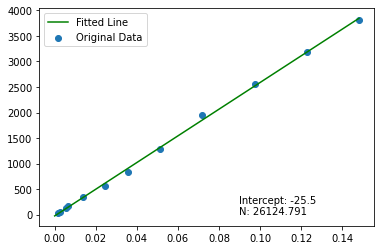

-25.49914184173599


In [86]:
#CASO 1 - Yacimientos volumétricos subsaturados
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

d3=pd.read_excel("datayac3.xlsx")
d3["SGo"]=141.5/(131.5+d3["API"])
d3["x"]=(7.916*(10**-4)*(d3["API"][0]**1.541))-4.561*(10**-5)*((d3["T"][0]-460)**1.3911) 
d3["Rs"]= round((((d3["P"]/112.727)+12.34)*(d3["SGg"][0]**0.8439)*(10**d3["x"][0]))**1.73184, 2) #scf/stb
d3["Bo"]=1.0113+(7.2046*(10**-5)*(((d3["Rs"]**0.3738)*((d3["SGg"][0]**0.2914)/(d3["SGo"][0]**0.6265)))+(0.24626*((d3["T"][0]-460)**0.5371)))**3.0936) #BY/BN
d3["Rp"]=d3["Rs"]
d3["Eo"]=-1*(d3["Bo"]-d3["Bo"][0])
d3["F"]=(d3["Np"]*d3["Bo"])+(d3["Wp"]*d3["Bw"][0])#
d3["Efw"]=d3["Bo"][0]*(((d3["Cw"][0]*d3["Swi"][0])+d3["Cf"][0])/(1-d3["Swi"][0]))*(d3["P"][0]-d3["P"])
d3["Eo+Efw"]=d3["Eo"]+d3["Efw"]

yy0=d3.to_excel("Resultados yacimiento subsaturado.xlsx")
print(d3)
slope, intercept, r_value, p_value, std_err = stats.linregress(
        d3["Eo+Efw"][1:], d3["F"][1:])
print(slope)
y_fit = intercept + (d3["Eo+Efw"] * slope)  
fig, ax = plt.subplots()
ax.scatter(d3["Eo+Efw"][1:],d3["F"][1:], label="Original Data")
ax.plot(d3["Eo+Efw"], y_fit, c="g", label="Fitted Line")
plt.legend()
text = "Intercept: %.1f\nN: %.3f" % (intercept, slope)
plt.text(0.09, 5, text)
plt.show()
print(intercept)




       Pb   API   SGg      T   Swi   Bw       Cf        Cw     P      Np  ...  \
0  4500.0  30.0  0.85  550.0  0.24  1.0  0.00005  0.000036  4205  2.5449  ...   
1     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  4157  3.0399  ...   
2     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  4112  3.5039  ...   
3     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  4082  3.8133  ...   
4     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  4021  4.4400  ...   
5     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3976  4.9063  ...   
6     NaN   NaN   NaN    NaN   NaN  NaN      NaN       NaN  3938  5.2982  ...   

         Bg       Wp       SGo         x       Rs        Bo        Rp  \
0  0.000741   3.9134  0.876161  0.125681  1125.78  1.479825  0.000168   
1  0.000746   6.8462       NaN  0.125681  1109.11  1.473100  0.000148   
2  0.000752  10.2911       NaN  0.125681  1093.57  1.466834  0.000133   
3  0.000756  12.9615       NaN  0.125681  1083.27  1.462682

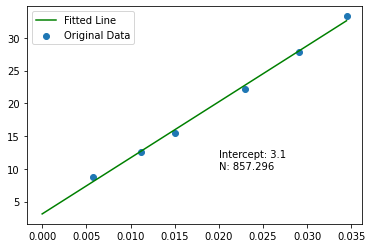

3.103878829003044


In [84]:
#Yacimientos Volumétricos de petróleo saturado 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#Se desconoce m y N
d2=pd.read_excel("datayac2.xlsx")
d2["SGo"]=141.5/(131.5+d2["API"])
d2["x"]=(7.916*(10**-4)*(d2["API"][0]**1.541))-4.561*(10**-5)*((d2["T"][0]-460)**1.3911) 
d2["Rs"]= round((((d2["P"]/112.727)+12.34)*(d2["SGg"][0]**0.8439)*(10**d2["x"][0]))**1.73184, 2) #scf/stb
d2["Bo"]=1.0113+(7.2046*(10**-5)*(((d2["Rs"]**0.3738)*((d2["SGg"][0]**0.2914)/(d2["SGo"][0]**0.6265)))+(0.24626*((d2["T"][0]-460)**0.5371)))**3.0936) #BY/stb
d2["Rp"]=d2["Np"]/d2["Gp"]
d2["Bt"]=d2["Bo"]+(d2["Bg"]*(d2["Rs"][0]-d2["Rs"]))
d2["Eo"]=d2["Bt"]-d2["Bt"][0]
d2["F"]=d2["Np"]*(d2["Bt"]+((d2["Rp"]-d2["Rs"][0])*d2["Bg"]))+(d2["Wp"]*d2["Bw"][0])
print(d2)
yy=d2.to_excel("Resultados Yacimiento Saturado.xlsx")
slope, intercept, r_value, p_value, std_err = stats.linregress(
        d2["Eo"][1:], d2["F"][1:])
print(slope)
y_fit = intercept + (d2["Eo"] * slope)  
fig, ax = plt.subplots()
ax.scatter(d2["Eo"][1:],d2["F"][1:], label="Original Data")
ax.plot(d2["Eo"], y_fit, c="g", label="Fitted Line")
plt.legend()
text = "Intercept: %.1f\nN: %.3f" % (intercept, slope)
plt.text(0.02, 10, text)
plt.show()
print(intercept)



       Pb   API   SGg      T       Co  Unnamed: 5  Unnamed: 6     P      Np  \
0  2377.0  40.0  0.85  595.0  0.00067         NaN         NaN  3330     NaN   
1     NaN   NaN   NaN    NaN      NaN         NaN         NaN  3150   3.295   
2     NaN   NaN   NaN    NaN      NaN         NaN         NaN  3000   5.903   
3     NaN   NaN   NaN    NaN      NaN         NaN         NaN  2850   8.852   
4     NaN   NaN   NaN    NaN      NaN         NaN         NaN  2700  11.503   
5     NaN   NaN   NaN    NaN      NaN         NaN         NaN  2550  14.513   
6     NaN   NaN   NaN    NaN      NaN         NaN         NaN  2400  17.730   

       Rp  ...       SGo         x       Rs        Bo          F        Eg  \
0     NaN  ...  0.825073  0.191025  1088.26  1.573216        NaN  0.000000   
1  1050.0  ...       NaN  0.191025  1017.41  1.538935   5.169584  0.088445   
2  1060.0  ...       NaN  0.191025   959.91  1.511122   9.487352  0.156323   
3  1160.0  ...       NaN  0.191025   903.84  1.484005  

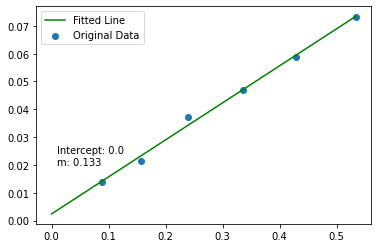

0.0024200257563688904


In [85]:
#CASO 3 YACIMIENTOS CON EMPUJE DE CAPA DE GAS, Se conoce N
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

d1=pd.read_excel("datayac.xlsx")

d1["SGo"]=141.5/(131.5+d1["API"])
d1["x"]=(7.916*(10**-4)*(d1["API"][0]**1.541))-4.561*(10**-5)*((d1["T"][0]-460)**1.3911) 
d1["Rs"]= round((((d1["P"]/112.727)+12.34)*(d1["SGg"][0]**0.8439)*(10**d1["x"][0]))**1.73184, 2) #scf/stb
d1["Bo"]=1.0113+(7.2046*(10**-5)*(((d1["Rs"]**0.3738)*((d1["SGg"][0]**0.2914)/(d1["SGo"][0]**0.6265)))+(0.24626*((d1["T"][0]-460)**0.5371)))**3.0936) #BY/stb
d1["F"]= d1['Np']*(d1["Bo"]+(d1["Rp"]-d1["Rs"])*d1["Bg"])
d1["Eg"]=d1["Bo"]*((d1["Bg"]/d1["Bg"][0])-1)
d1["Eo"]=(d1["Bo"]-d1["Bo"][0])+((d1["Rs"][0]-d1["Rs"])*d1["Bg"])
d1["Eg/Eo"]=d1["Eg"]/d1["Eo"]
d1["F/Eo"]=d1["F"]/d1["Eo"]
d1["(F/N)-Eo"]=(d1["F"]/d1["N"][0])-d1["Eo"]
print(d1)
yy2=d1.to_excel("Resultados yacimiento capa de gas.xlsx")

slope, intercept, r_value, p_value, std_err = stats.linregress(
        d1["Eg"][1:], d1["(F/N)-Eo"][1:])
print(slope)
y_fit = intercept + (d1["Eg"] * slope)  
fig, ax = plt.subplots()
ax.scatter(d1["Eg"][1:],d1["(F/N)-Eo"][1:], label="Original Data")
ax.plot(d1["Eg"], y_fit, c="g", label="Fitted Line")
plt.legend()
text = "Intercept: %.1f\nm: %.3f" % (intercept, slope)
plt.text(0.009, 0.02, text)
plt.show()
print(intercept)


